<h1>Dataset Augmentation</h1>

**Preparing a dataset to apply CNN processing using Dataset Augmentation technique.**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D,Flatten,Dense
from tensorflow.keras.utils import to_categorical
from keras import layers
import keras

**Making training Dataset and Testing Dataset**

In [2]:
train_dir = "C:/Users/User21/Downloads/iris/train"

# os.path.join = (Use to join path) To create new folder 'train' on same path

In [3]:
print("Training Directory", train_dir)

Training Directory C:/Users/User21/Downloads/iris/train


**We created 3 paths : Original path, Train data path, Validation data path**

In [4]:
batch_size = 3
# 32 images at a time

img_size = (160,160)

In [5]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir, batch_size= batch_size, image_size=img_size)

# image_dataset_from_directory = take image from path 
# train_dir = path of training data

Found 9 files belonging to 3 classes.


**Code for appling Dataset Augmentation**

In [6]:
# creating a Neural network (2- Layers)

dataset_augmentation = tf.keras.Sequential([tf.keras.layers.RandomFlip('horizontal'),
                                           tf.keras.layers.RandomRotation(0.2)])


# dataset_augmentation = Name of my Neural network

# RandomFlip = to flip image
# RandomRotation = rotate that img

**Displaying the Results of Dataset Augmentation by Image into Consideration**

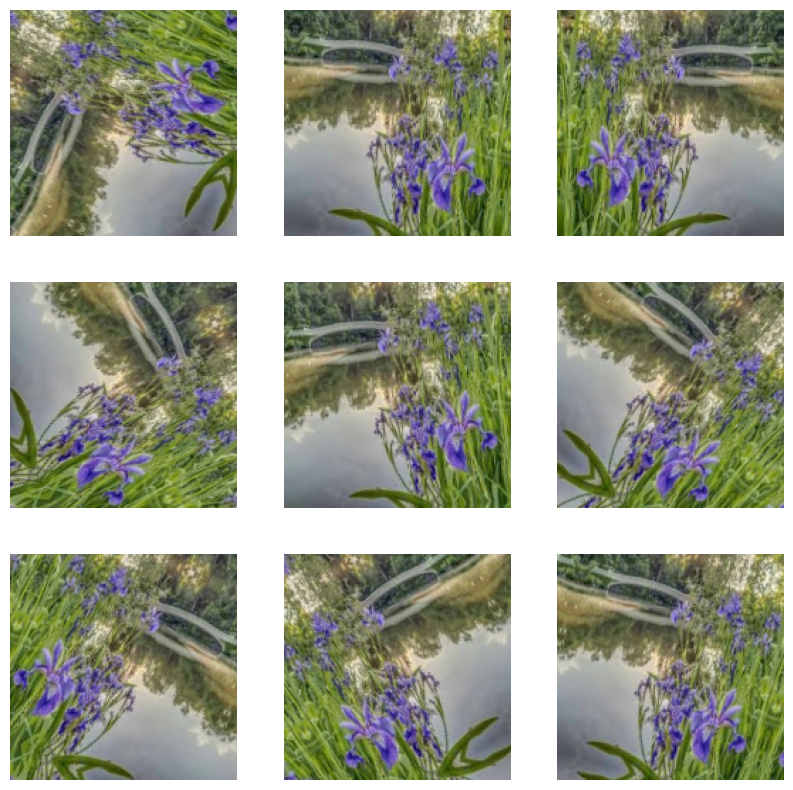

In [7]:
for image,_ in train_dataset.take(1):
    plt.figure(figsize=(10,10))
    first_image = image[0]
    
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        
        augmented_image = dataset_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0]/255)
        plt.axis('off')
        
        
# train_dataset.take(1) = taking 1 image from train data

# tf.expand_dims = To expand dimention of img(Adding one extra dimention)
# 0 = add extra dimention ar 0th position
# old dim of img = (160,160,3)    3 = 3 colors(RGB)
# New dim of img = (1,160,160,3)

In [8]:
model = keras.Sequential([
  # Add the preprocessing layers you created earlier.
    dataset_augmentation,
  # Add the model layers
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(3,activation='softmax')
])

In [13]:
image_batch,label_batch = next(iter(train_dataset))

label_batch

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([0, 0, 2])>

In [14]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics='accuracy')

In [15]:
y_aug = to_categorical(label_batch)

In [16]:
model.fit(image_batch,y_aug,epochs = 2)

Epoch 1/2
1/1 [==============================] - 1s 1s/step - loss: 71.9417 - accuracy: 0.3333
Epoch 2/2
1/1 [==============================] - 0s 121ms/step - loss: 168.8907 - accuracy: 0.6667


In [17]:
model.predict(image_batch)

1/1 [==============================] - 0s 84ms/step


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [19]:
val_dir = "C:/Users/User21/Downloads/iris/validation"
validation_dataset = tf.keras.utils.image_dataset_from_directory(val_dir, batch_size= batch_size, image_size=img_size)

Found 9 files belonging to 3 classes.


In [20]:
image_batch1,label_batch1 = next(iter(validation_dataset))

In [21]:
model.predict(image_batch1)

1/1 [==============================] - 0s 23ms/step


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [22]:
y_aug

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)